# Breast Cancer Prediction Using Data Science Machine Learning

# Problem Statement
Features are computed from a image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image.

# About the dataset (Breast Cancer Data)
radius: mean of distances from center to points on the perimeter

texture: standard deviation of gray-scale values

perimeter: Perimeter

area: Area

smoothness: local variation in radius lengths

compactness: perimeter^2 / area - 1.0

concavity: severity of concave portions of the contour

concave points: number of concave portions of the contour

symmetry: Symmetry

fractal dimension: fractal dimension

Diagnosis: The cancer is benign or malignant?(Target variable) (M = malignant, B = benign)

# Steps are:
1.Gathering Data

2.Exploratory Data Analysis

3.Data Visualizations

4.Model Implementation.

5.ML Model Selecting and Model PredPrediction

6.HyperTunning the ML Model

# Import Libraries

#### Let us import required libraries

In [46]:
# import 'Pandas'
import pandas as pd
# import 'Numpy'
import numpy as np
# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# import 'Seaborn'
import seaborn as sns
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')
# display all columns of the dataframe
pd.options.display.max_columns = None
# display all rows of the dataframe
pd.options.display.max_rows = None
# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
  

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# Data Preparation

#### Read the dataset and print the first five observations.

In [3]:
# load the csv file
# store the data in 'data'
data = pd.read_csv('cancer_data.csv')

# display first five observations using head()
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,NaN
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,NaN
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,NaN
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,NaN
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,NaN


### Attribute Information:
1.ID number

2.Diagnosis (M = malignant, B = benign)

3.Ten real-valued features are computed for each cell nucleus:

4.radius (mean of distances from center to points on the perimeter)

5.texture (standard deviation of gray-scale values)

6.perimeter

7.area

8.smoothness (local variation in radius lengths)

9.compactness (perimeter^2 / area - 1.0)

10.concavity (severity of concave portions of the contour)

11.concave points (number of concave portions of the contour)

12.symmetry

13.fractal dimension ("coastline approximation" - 1)

**Let us now see the number of variables and observations in the data.**

In [4]:
# use 'shape' to check the dimension of data
data.shape

(569, 33)

**Interpretation:** The data has 569 observations and 31 variables.

In [5]:
data.shape

(569, 33)

# Exploratory Data Analysis

# Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [6]:
# use 'dtypes' to check the data type of a variable
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**Interpretation:** All the indeppendent variables are numeric.

In [7]:
data.info()
#information of the columns/variables and count of non null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.describe().T
#summerise the numerical columns (5 point summary)
#min, max,medidan,std,Count

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [9]:
data.describe(include='O')
#summerize the categorical columns (5 point summary)

,diagnosis
count,569
unique,2
top,B
freq,357


In [10]:
# standardisation: how close or far the data lies from the centre.
data.std()
#column ID is found to be insignificant.

id                        125020585.612224
radius_mean                       3.524049
texture_mean                      4.301036
perimeter_mean                   24.298981
area_mean                       351.914129
smoothness_mean                   0.014064
compactness_mean                  0.052813
concavity_mean                    0.079720
concave points_mean               0.038803
symmetry_mean                     0.027414
fractal_dimension_mean            0.007060
radius_se                         0.277313
texture_se                        0.551648
perimeter_se                      2.021855
area_se                          45.491006
smoothness_se                     0.003003
compactness_se                    0.017908
concavity_se                      0.030186
concave points_se                 0.006170
symmetry_se                       0.008266
fractal_dimension_se              0.002646
radius_worst                      4.833242
texture_worst                     6.146258
perimeter_w

### Remove Insignificant Variables

The column `id` contains the id number of the samples, which is redundant for further analysis. Thus, we drop the column.

In [11]:
#dropping the unwanted column in the dataset which is insignificant for the  model.
data.drop(['id'],axis=1,inplace=True)

### Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [12]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = data.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Unnamed: 32,569,100.000000
radius_mean,0,0.000000
fractal_dimension_worst,0,0.000000
symmetry_worst,0,0.000000
concave points_worst,0,0.000000
concavity_worst,0,0.000000
compactness_worst,0,0.000000
smoothness_worst,0,0.000000
area_worst,0,0.000000
perimeter_worst,0,0.000000


Column Unnamed has 100% null values. hence, these column found to be insignificant for the model.

In [13]:
#dropping the unnamed column which is having greater than 70% of nulls in dataset
data = data.dropna(axis='columns')

In [14]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020


Distribution of target variable Diagnosis

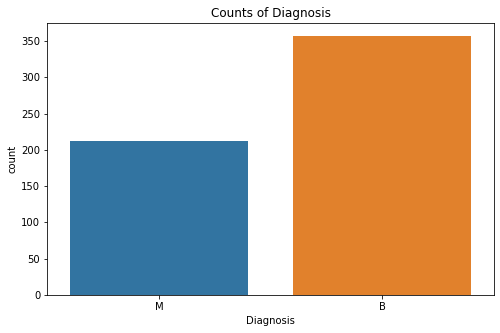

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot('diagnosis', data=data)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")
plt.show()

In [16]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

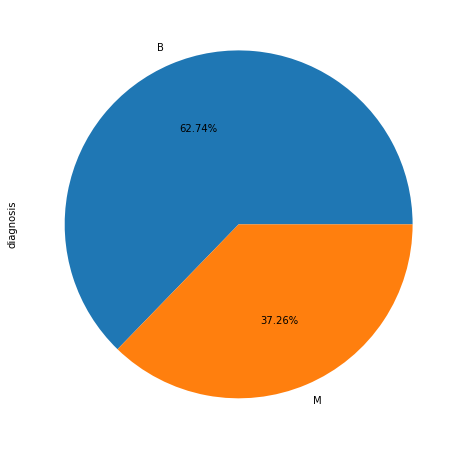

In [17]:
data['diagnosis'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

Interpretation: The above plot shows that there is not that much imbalance in the target variable.

Distribution of Numerical independent variables.

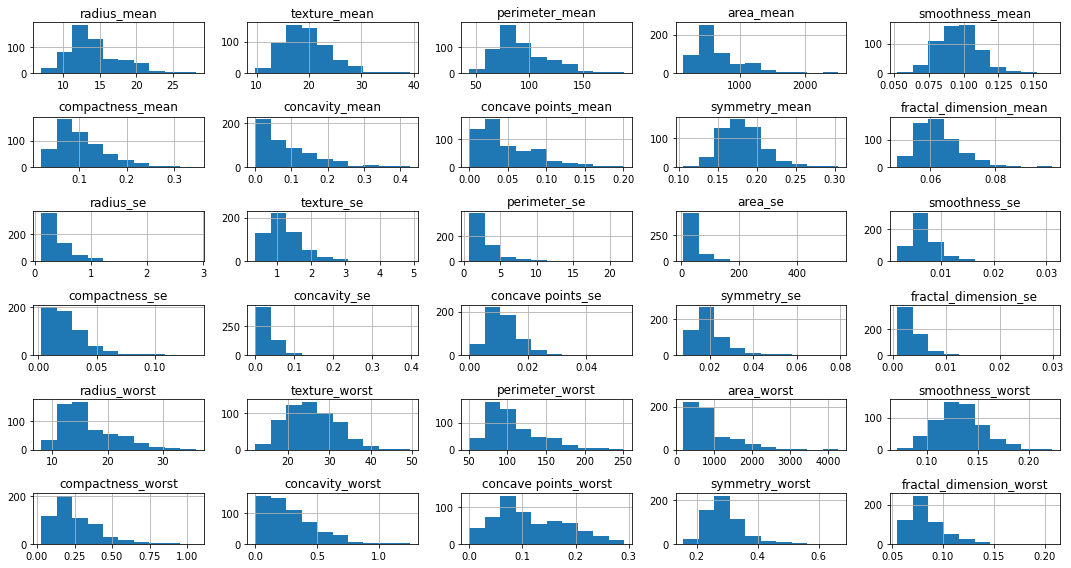

Skewness:


radius_mean               0.942380
texture_mean              0.650450
perimeter_mean            0.990650
area_mean                 1.645732
smoothness_mean           0.456324
compactness_mean          1.190123
concavity_mean            1.401180
concave points_mean       1.171180
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
perimeter_se              3.443615
area_se                   5.447186
smoothness_se             2.314450
compactness_se            1.902221
concavity_se              5.110463
concave points_se         1.444678
symmetry_se               2.195133
fractal_dimension_se      3.923969
radius_worst              1.103115
texture_worst             0.498321
perimeter_worst           1.128164
area_worst                1.859373
smoothness_worst          0.415426
compactness_worst         1.473555
concavity_worst           1.150237
concave points_worst      0.492616
symmetry_worst      

In [18]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
data.drop('diagnosis', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()
# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
data.drop('diagnosis', axis = 1).skew()


radius_mean
histogram plot for radius_mean


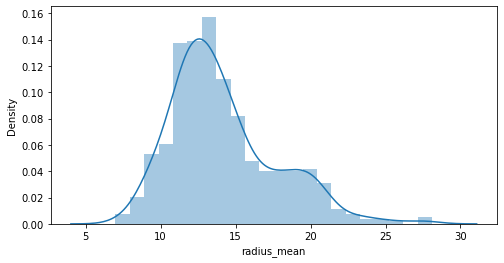

texture_mean
histogram plot for texture_mean


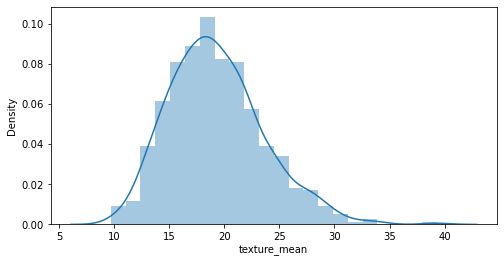

perimeter_mean
histogram plot for perimeter_mean


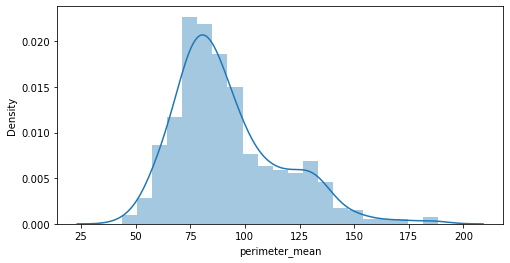

area_mean
histogram plot for area_mean


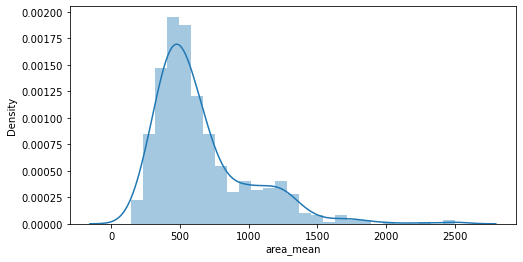

smoothness_mean
histogram plot for smoothness_mean


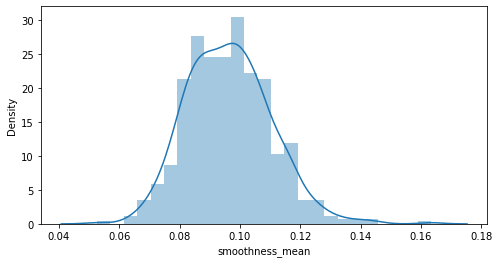

compactness_mean
histogram plot for compactness_mean


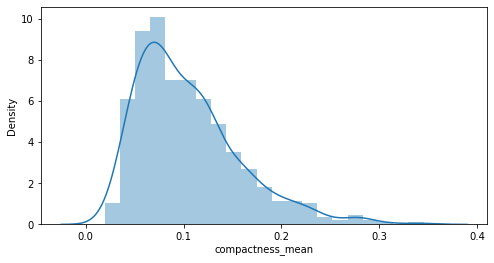

concavity_mean
histogram plot for concavity_mean


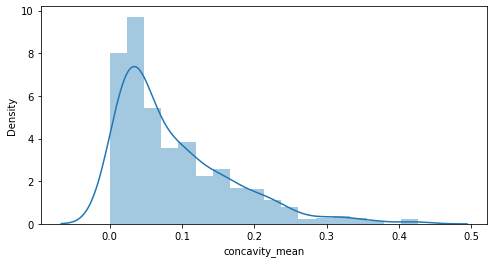

concave points_mean
histogram plot for concave points_mean


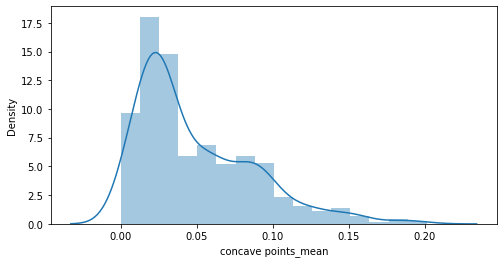

symmetry_mean
histogram plot for symmetry_mean


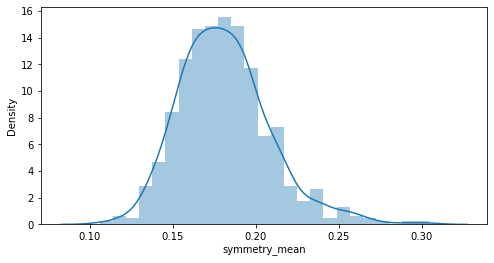

fractal_dimension_mean
histogram plot for fractal_dimension_mean


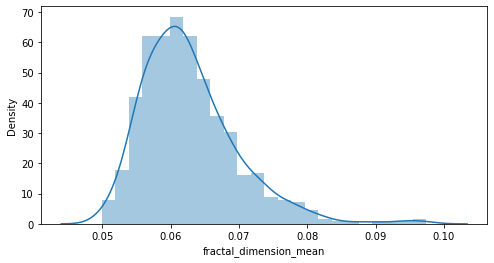

radius_se
histogram plot for radius_se


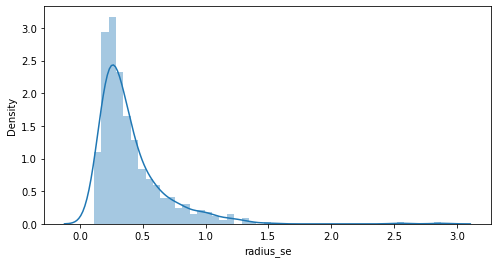

texture_se
histogram plot for texture_se


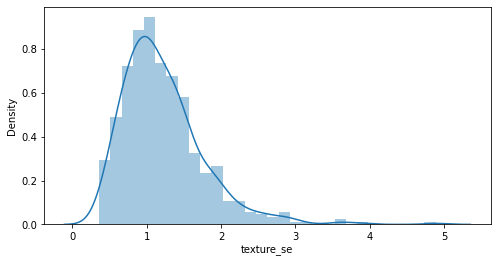

perimeter_se
histogram plot for perimeter_se


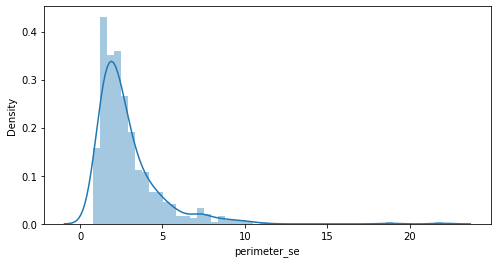

area_se
histogram plot for area_se


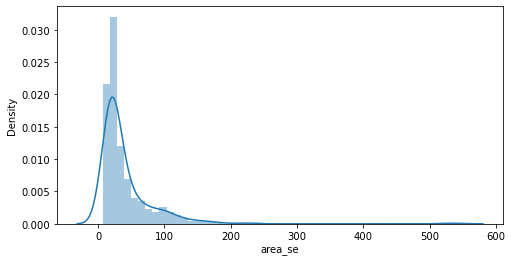

smoothness_se
histogram plot for smoothness_se


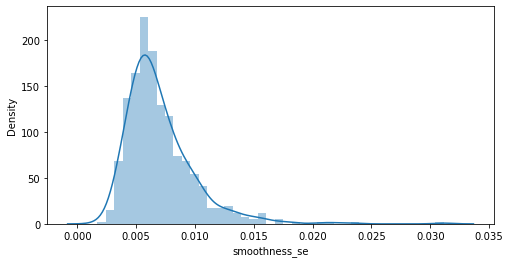

compactness_se
histogram plot for compactness_se


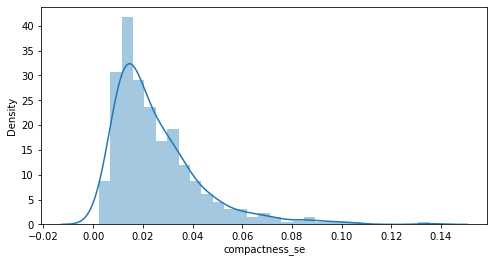

concavity_se
histogram plot for concavity_se


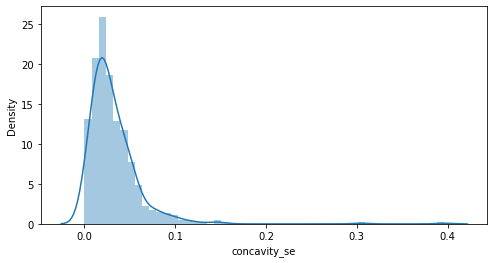

concave points_se
histogram plot for concave points_se


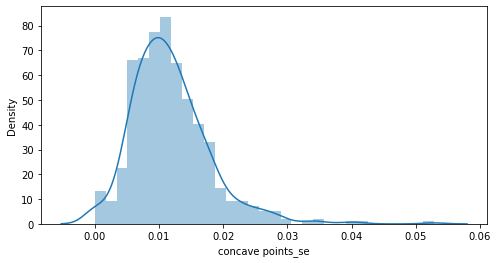

symmetry_se
histogram plot for symmetry_se


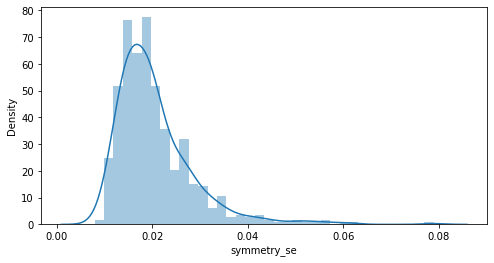

fractal_dimension_se
histogram plot for fractal_dimension_se


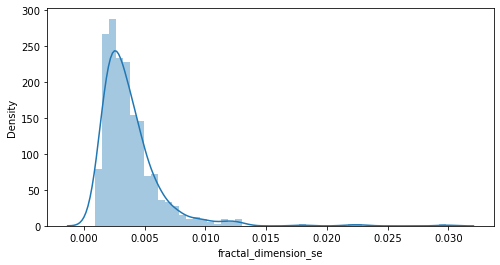

radius_worst
histogram plot for radius_worst


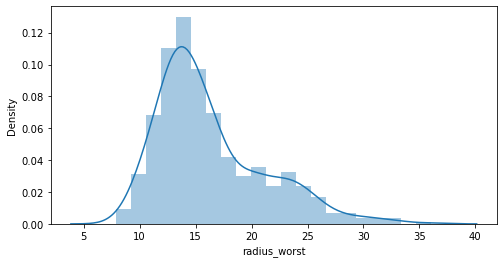

texture_worst
histogram plot for texture_worst


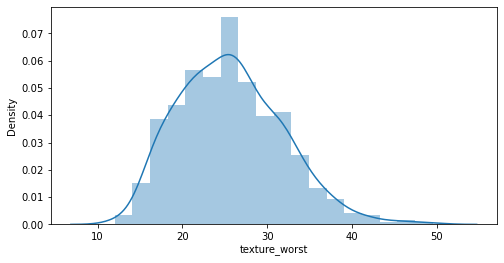

perimeter_worst
histogram plot for perimeter_worst


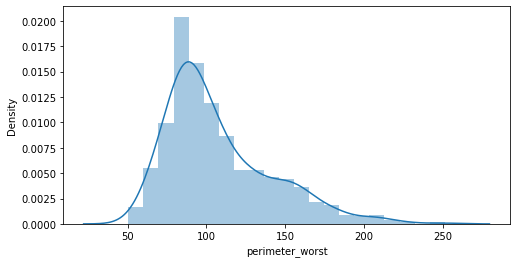

area_worst
histogram plot for area_worst


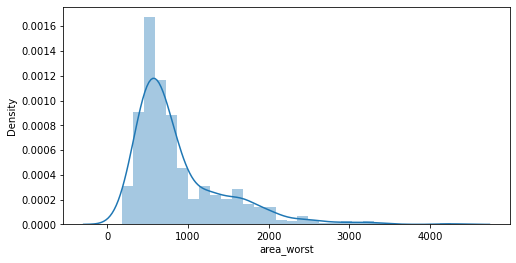

smoothness_worst
histogram plot for smoothness_worst


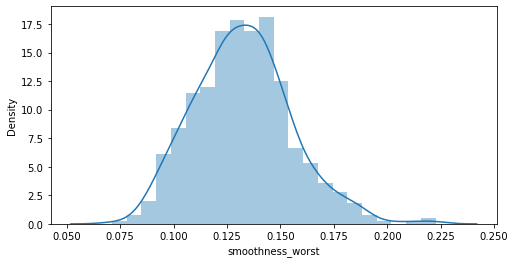

compactness_worst
histogram plot for compactness_worst


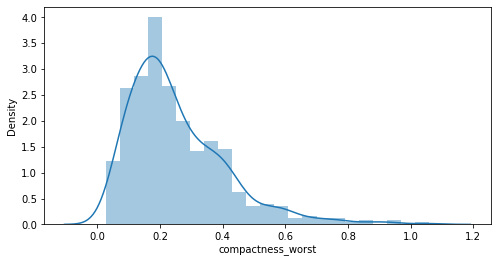

concavity_worst
histogram plot for concavity_worst


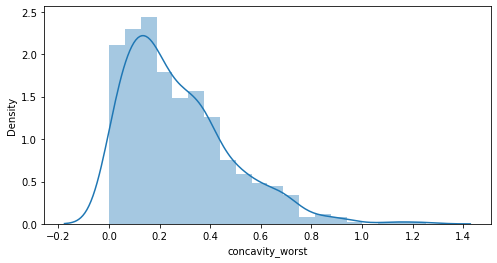

concave points_worst
histogram plot for concave points_worst


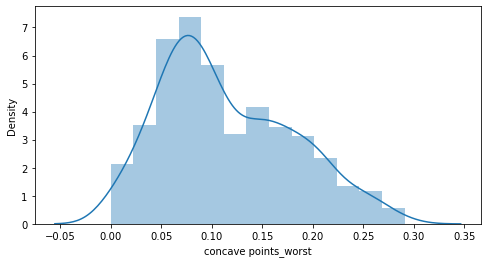

symmetry_worst
histogram plot for symmetry_worst


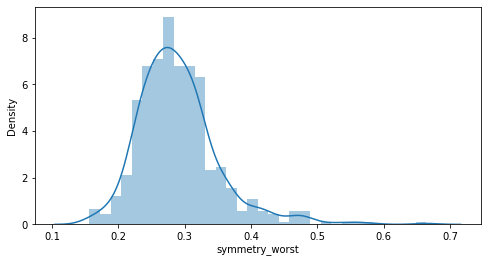

fractal_dimension_worst
histogram plot for fractal_dimension_worst


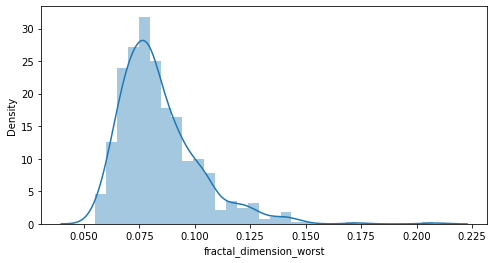

In [19]:
# Distribution plot for all the independent numerical variables
data_num=data.drop('diagnosis', axis = 1)
for col in data_num.columns:
    print(col)
    plt.figure(figsize=(8,4))
    print('histogram plot for',col)
    sns.distplot(data[col])
    plt.show()

radius_mean
box plot for radius_mean


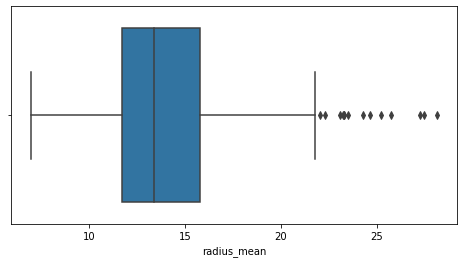

texture_mean
box plot for texture_mean


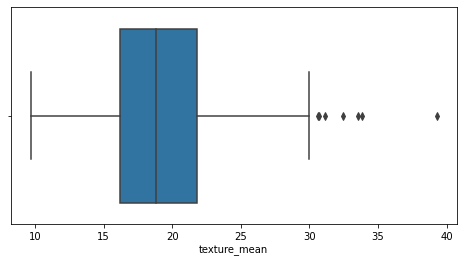

perimeter_mean
box plot for perimeter_mean


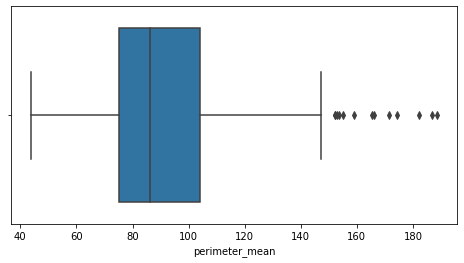

area_mean
box plot for area_mean


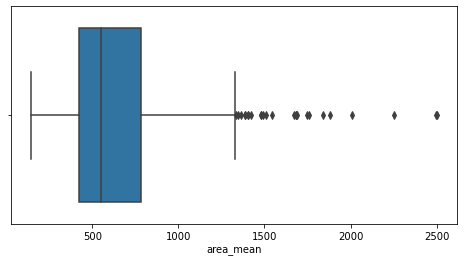

smoothness_mean
box plot for smoothness_mean


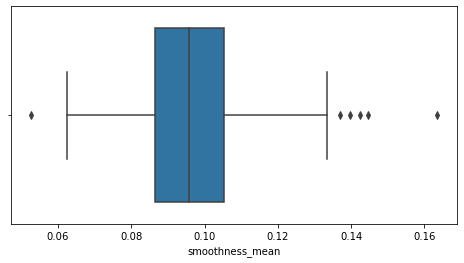

compactness_mean
box plot for compactness_mean


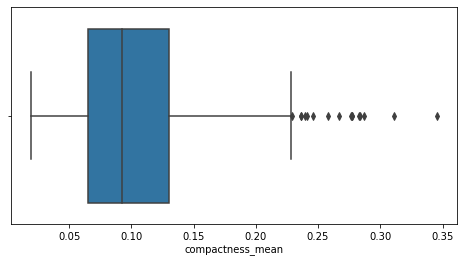

concavity_mean
box plot for concavity_mean


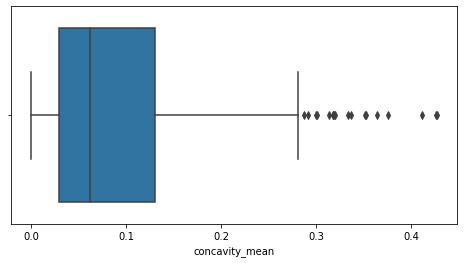

concave points_mean
box plot for concave points_mean


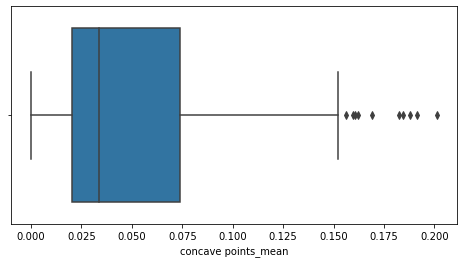

symmetry_mean
box plot for symmetry_mean


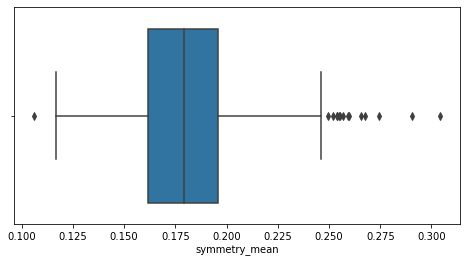

fractal_dimension_mean
box plot for fractal_dimension_mean


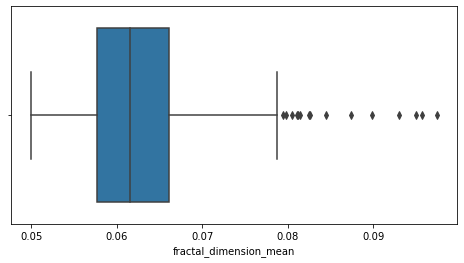

radius_se
box plot for radius_se


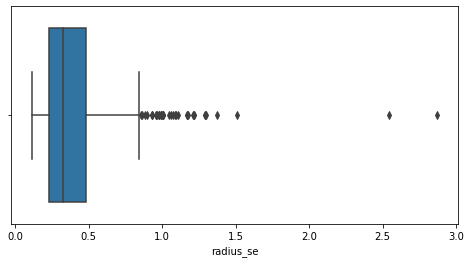

texture_se
box plot for texture_se


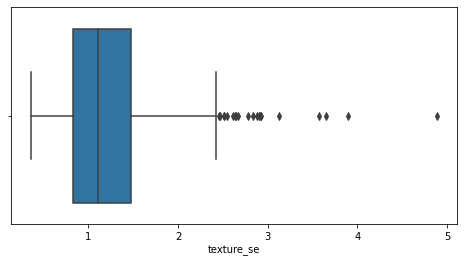

perimeter_se
box plot for perimeter_se


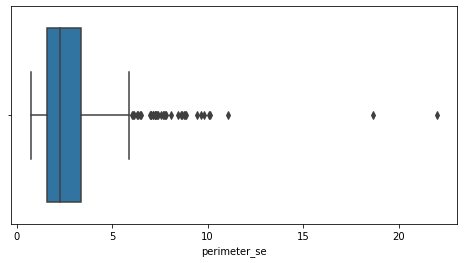

area_se
box plot for area_se


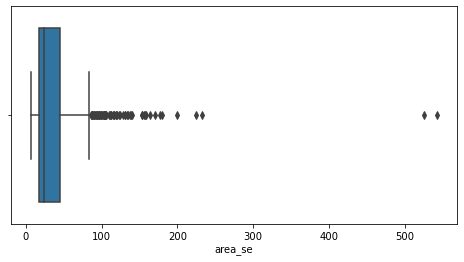

smoothness_se
box plot for smoothness_se


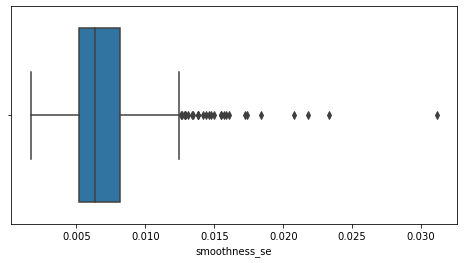

compactness_se
box plot for compactness_se


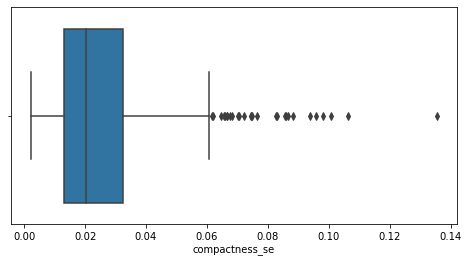

concavity_se
box plot for concavity_se


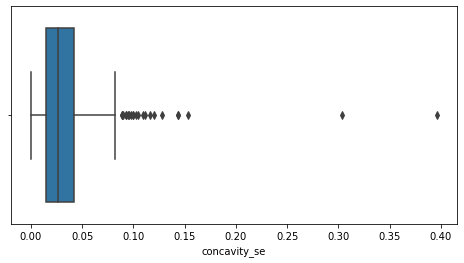

concave points_se
box plot for concave points_se


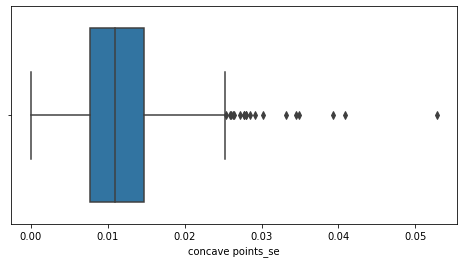

symmetry_se
box plot for symmetry_se


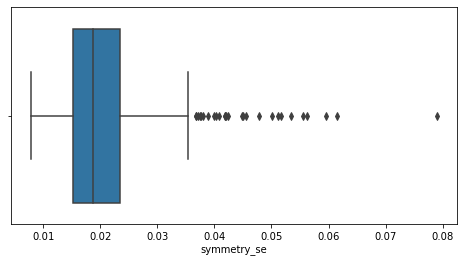

fractal_dimension_se
box plot for fractal_dimension_se


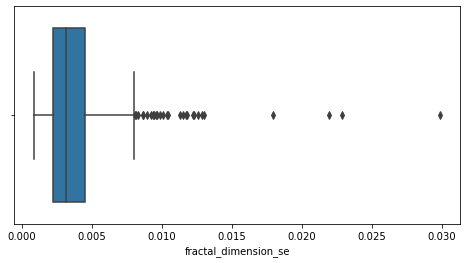

radius_worst
box plot for radius_worst


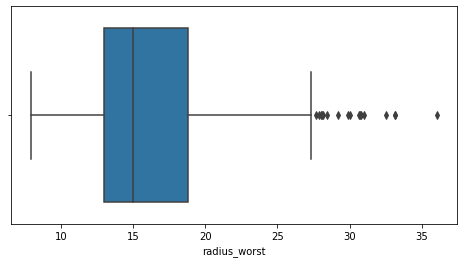

texture_worst
box plot for texture_worst


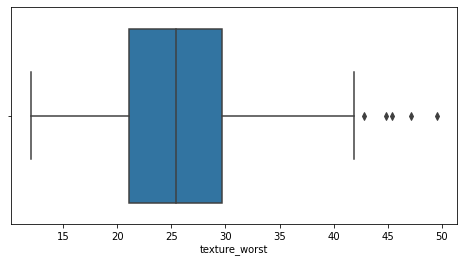

perimeter_worst
box plot for perimeter_worst


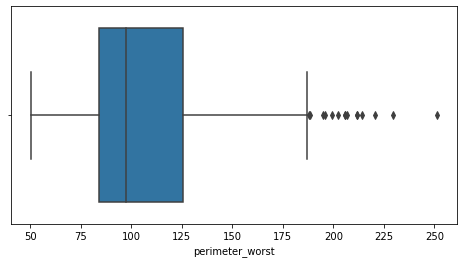

area_worst
box plot for area_worst


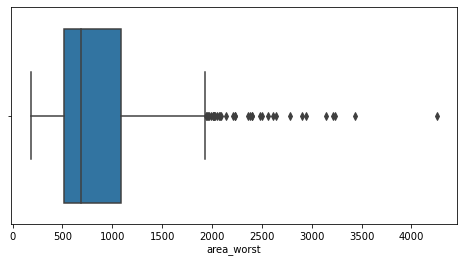

smoothness_worst
box plot for smoothness_worst


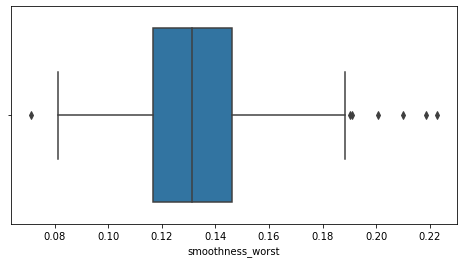

compactness_worst
box plot for compactness_worst


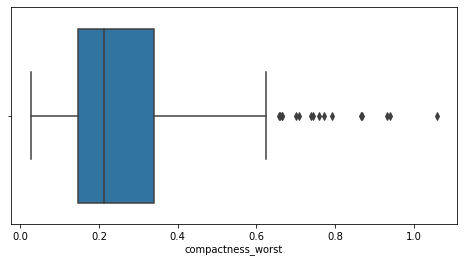

concavity_worst
box plot for concavity_worst


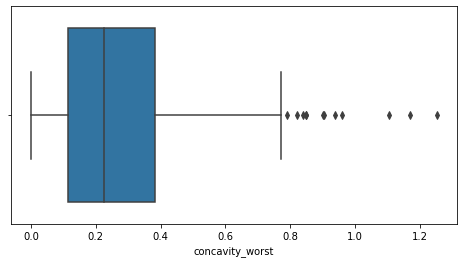

concave points_worst
box plot for concave points_worst


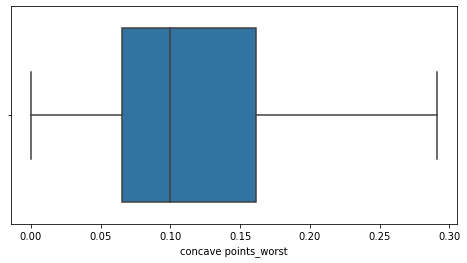

symmetry_worst
box plot for symmetry_worst


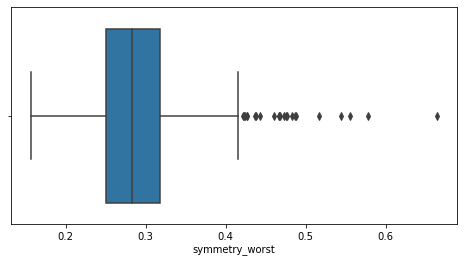

fractal_dimension_worst
box plot for fractal_dimension_worst


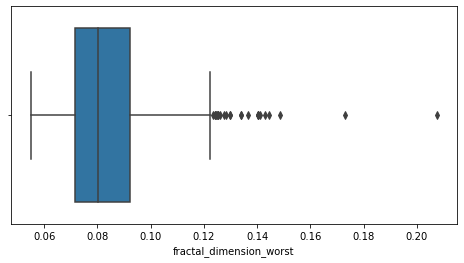

In [20]:
data_num=data.drop('diagnosis', axis = 1)
for i in data_num.columns:
    print(i)
    plt.figure(figsize=(8,4))
    print('box plot for',i)
    sns.boxplot(data[i])
    plt.show()

In [21]:
# IQR Method to calculate the outliers present in the dataset
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)
IQR=Q3-Q1

In [22]:
#column with number of outliers present with them
((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).sum()

radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

#### Plot pairwise relationships to check the correlations between the mean features

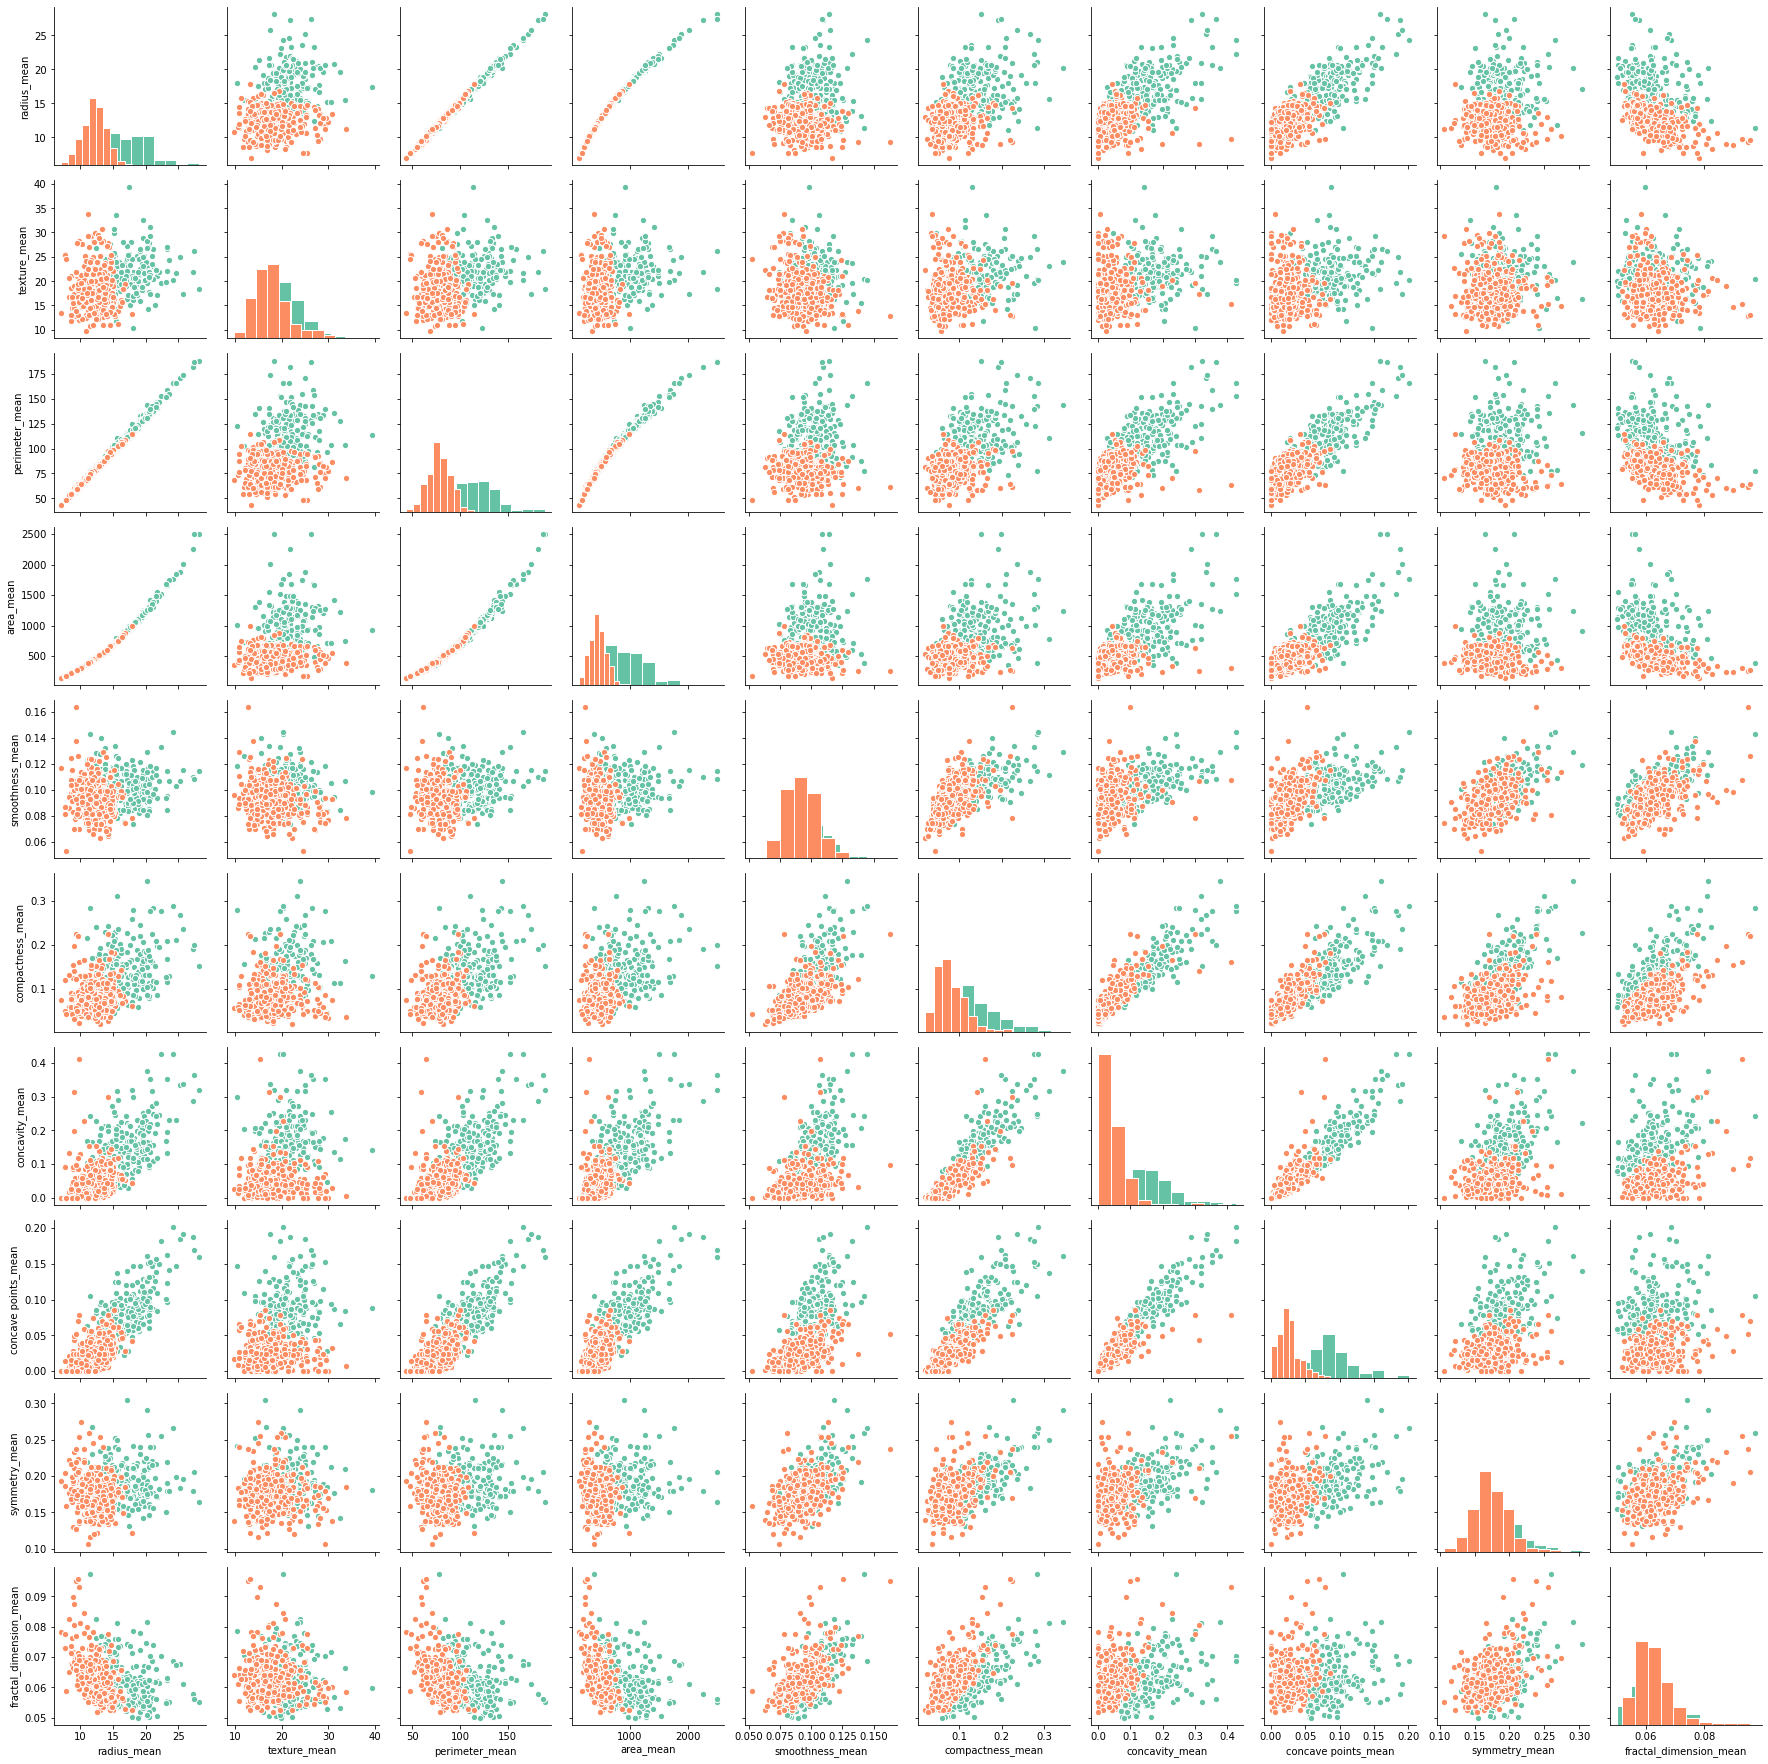

In [23]:
g = sns.PairGrid(data.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()

It seems that:

There are strong correlations between many variables. Next, a heatmap will be used to present the numerical correlations.

The univariate distributions on the diagonal show a separation of malignant and benign cells for several mean features. Malignant cells tend to have larger mean values of:

radius

perimeter

area

compactness

concavity

concave points

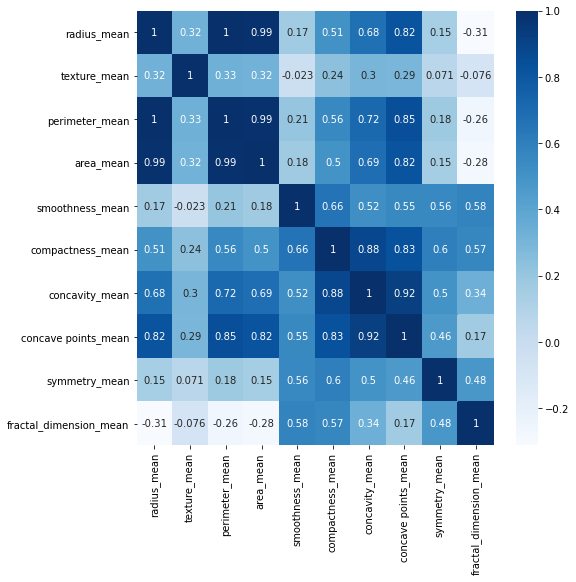

In [24]:
# Heatmap for the first 11 independent numerical variables
data_feature=data.iloc[:,1:11]
corr=data_feature.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

As it was expected there are very strong correlations between radius, perimeter and area.

Compactness, concavity and and concave points are also highly correlated.

These highly correlated features result in redundant information. It is suggested to remove highly correlated features to avoid a predictive bias for the information contained in these features.

#### Split the dependent and independent variables.

In [25]:
# store the target variable 'diagnosis' in a dataframe 'df_target'
df_target = data['diagnosis']
# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'diagnosis' using drop()
# 'axis = 1' drops the specified column
df_feature = data.drop('diagnosis', axis = 1)

In [26]:
# if the value in the target variable is 'B' then replace it with 0 else with 1
# i.e. set 0 for benign (negative class)
for i in range(len(df_target)):
    if df_target[i] == 'B':
        df_target[i] = 0
    else:
        df_target[i] = 1       
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

#### Filter numerical and categorical variables.

In [27]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_feature = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_feature.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

in this data set we have all the independent variables as numerical variables

#### Train-Test Split

In [28]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, random_state = 10, test_size = 0.33)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (381, 30)
y_train (381,)
X_test (188, 30)
y_test (188,)


#### Define a function to plot confusion matrix

In [29]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

# K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for K nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like Euclidean

Training time: 0.132 s
Prediction time: 0.862 s

Report:

Accuracy: 0.9414893617021277

               precision    recall  f1-score   support

           0       0.95      0.96      0.96       124
           1       0.92      0.91      0.91        64

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188

[[119   5]
 [  6  58]]


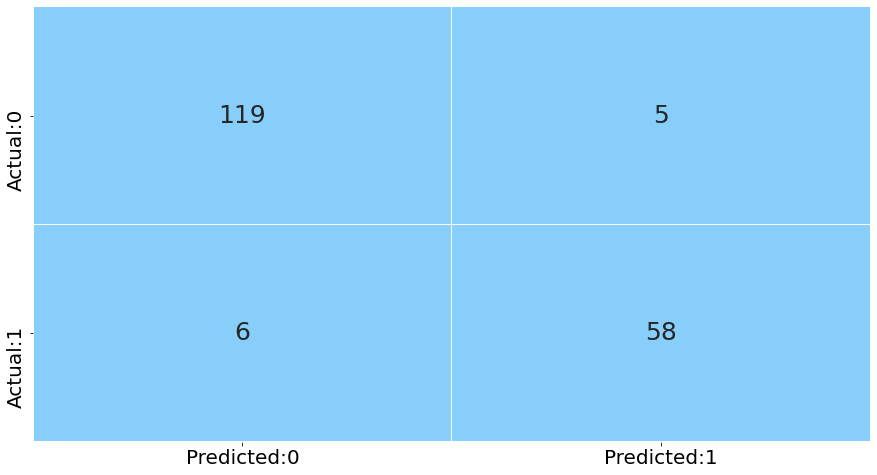

None


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    knn_classification = KNeighborsClassifier(n_neighbors = 5)

    # Fit the classifier on the training features and labels.
    t0 = time()
    knn_model=knn_classification.fit(X_train, y_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = knn_model.predict(X_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = knn_model.score(X_test, y_test)
    report = classification_report(y_test, predictions)
    
    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(y_test, predictions))
    print(plot_confusion_matrix(knn_model, test_data = X_test))
print_ml_results()

# Decision Tree for Classification

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

Training time: 0.063 s
Prediction time: 0.0 s

Report:

Accuracy: 0.9468085106382979

               precision    recall  f1-score   support

           0       0.97      0.95      0.96       124
           1       0.91      0.94      0.92        64

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188

[[118   6]
 [  4  60]]


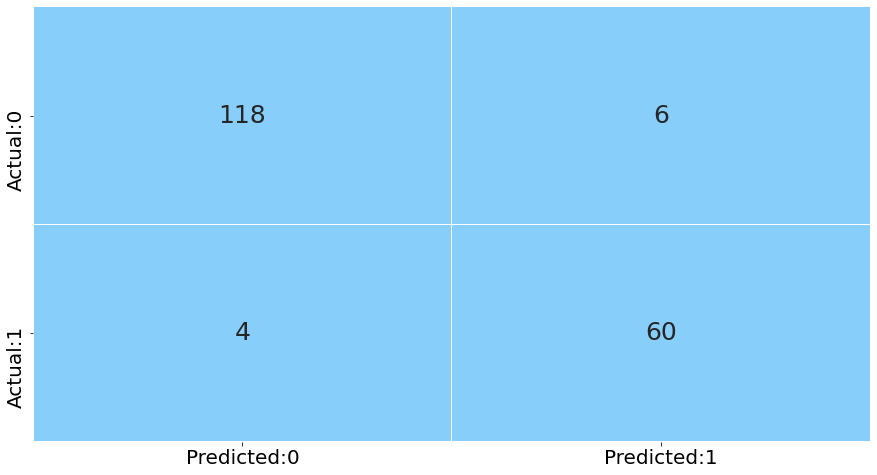

None


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

    # Fit the classifier on the training features and labels.
    t0 = time()
    decision_tree = decision_tree_classification.fit(X_train, y_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = decision_tree.predict(X_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = decision_tree.score(X_test, y_test)
    report = classification_report(y_test, predictions)
    
    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(y_test, predictions))
    print(plot_confusion_matrix(decision_tree, test_data = X_test))
print_ml_results()

# Random Forest for Classification

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes.

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree.

Training time: 0.094 s
Prediction time: 0.016 s

Report:

Accuracy: 0.9574468085106383

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       124
           1       0.94      0.94      0.94        64

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

[[120   4]
 [  4  60]]


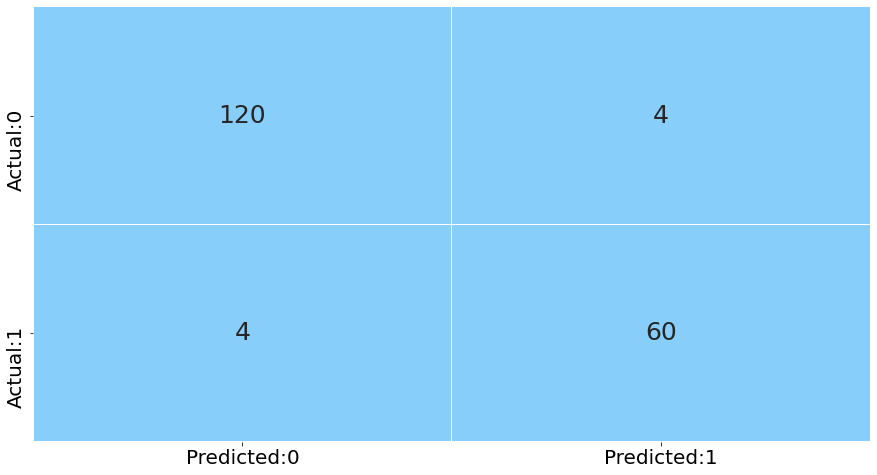

None


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
    # Fit the classifier on the training features and labels.
    t0 = time()
    rf_model = rf_classification.fit(X_train, y_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = rf_model.predict(X_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = rf_model.score(X_test, y_test)
    report = classification_report(y_test, predictions)
    
    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(y_test, predictions))
    print(plot_confusion_matrix(rf_model, test_data = X_test))
print_ml_results()

#### Let us normalize the data 

#### Standardize the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [33]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
num_scaled = X_scaler.fit_transform(df_feature)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X_std = pd.DataFrame(num_scaled, columns = df_feature.columns)

X_std.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Train Test Split for standardised dataset

In [34]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X_std, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (398, 30)
y_train (398,)
X_test (171, 30)
y_test (171,)


### KNN Model after standardising the dataset

Training time: 0.016 s
Prediction time: 0.031 s

Report:

Accuracy: 0.9824561403508771

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       112
           1       0.98      0.97      0.97        59

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[111   1]
 [  2  57]]


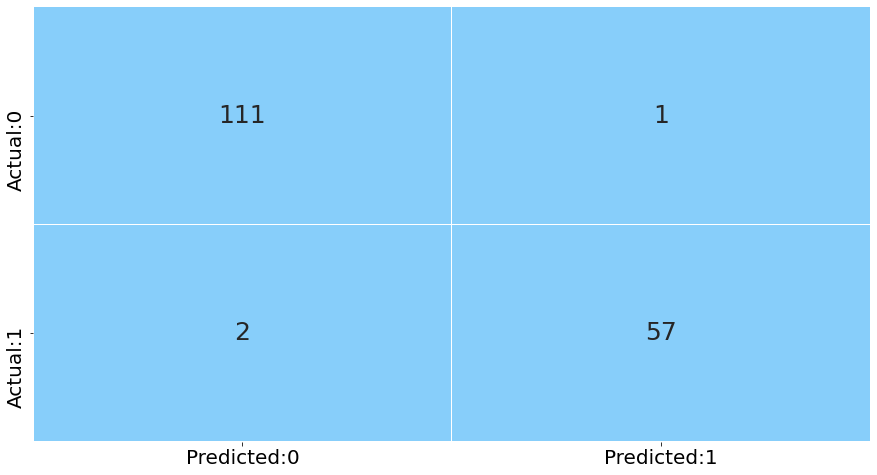

None


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    knn_classification = KNeighborsClassifier(n_neighbors = 3)

    # Fit the classifier on the training features and labels.
    t0 = time()
    knn_model=knn_classification.fit(X_train, y_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = knn_model.predict(X_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = knn_model.score(X_test, y_test)
    report = classification_report(y_test, predictions)
    
    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(y_test, predictions))
    print(plot_confusion_matrix(knn_model, test_data = X_test))
print_ml_results()

### Decsion Tree Model for standardised model

Training time: 0.04 s
Prediction time: 0.0 s

Report:

Accuracy: 0.9590643274853801

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       112
           1       0.92      0.97      0.94        59

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[107   5]
 [  2  57]]


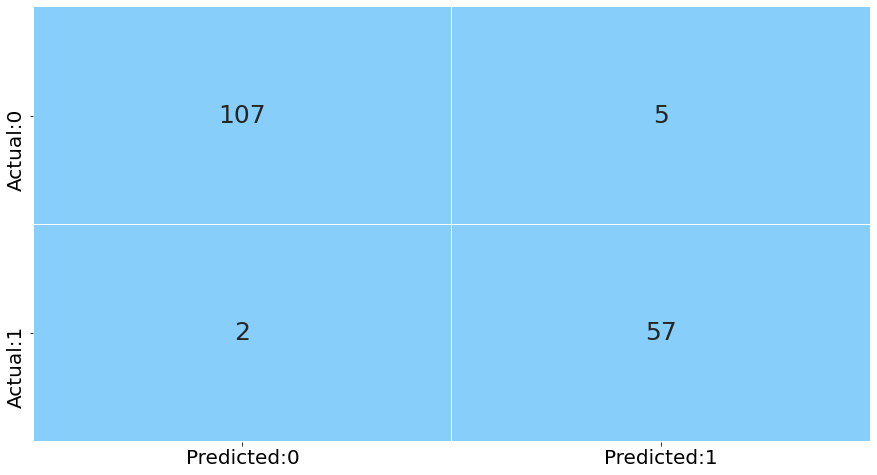

None


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

    # Fit the classifier on the training features and labels.
    t0 = time()
    decision_tree = decision_tree_classification.fit(X_train, y_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = decision_tree.predict(X_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = decision_tree.score(X_test, y_test)
    report = classification_report(y_test, predictions)
    
    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(y_test, predictions))
    print(plot_confusion_matrix(decision_tree, test_data = X_test))
print_ml_results()

### Random Forest Model for standardised datset

Training time: 0.063 s
Prediction time: 0.0 s

Report:

Accuracy: 0.9649122807017544

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       112
           1       0.93      0.97      0.95        59

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[108   4]
 [  2  57]]


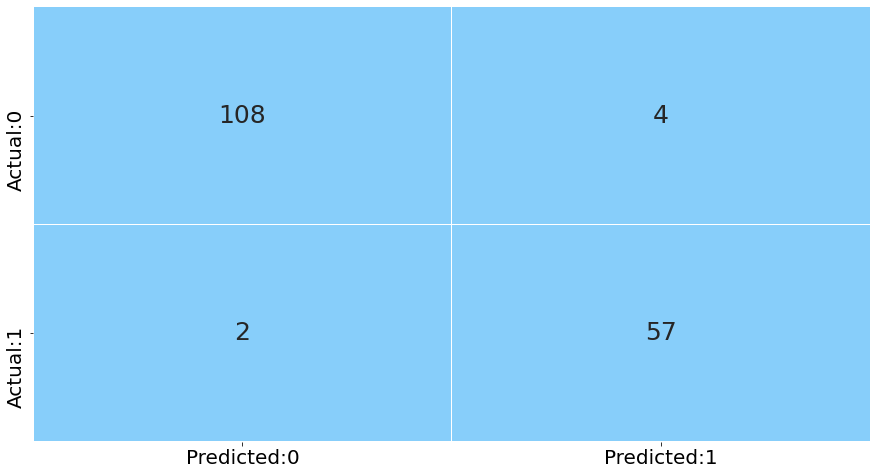

None


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
    # Fit the classifier on the training features and labels.
    t0 = time()
    rf_model = rf_classification.fit(X_train, y_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = rf_model.predict(X_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = rf_model.score(X_test, y_test)
    report = classification_report(y_test, predictions)
    
    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(y_test, predictions))
    print(plot_confusion_matrix(rf_model, test_data = X_test))
print_ml_results()

#### Identify the imporatant Feature

Let us create a barplot to identify the important feature in the dataset.

The method feature_importances_ returns the value corresponding to each feature which is defined as the ratio of total decrease in Gini impurity across every tree in the forest where the feature is used to the total count of trees in the forest. This is also caled as, Gini Importance.

There is another accuracy-based method. It calculates the average decrease in the accuracy calculated on the out-of-bag samples, with and without shuffling the variable across all the trees in the random forest. The out-of-bag samples are the samples in the training dataset which are not considered whild building a tree.

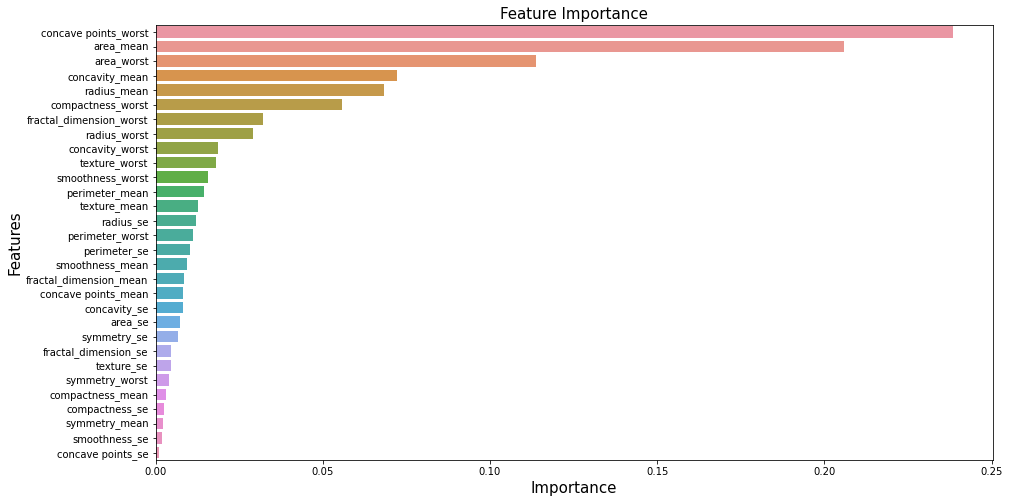

In [38]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Tune the Hyperparameters using GridSearchCV (Random Forest)

Training time: 0.094 s
Prediction time: 0.016 s

Report:

Accuracy: 0.9649122807017544

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       112
           1       0.93      0.97      0.95        59

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[108   4]
 [  2  57]]


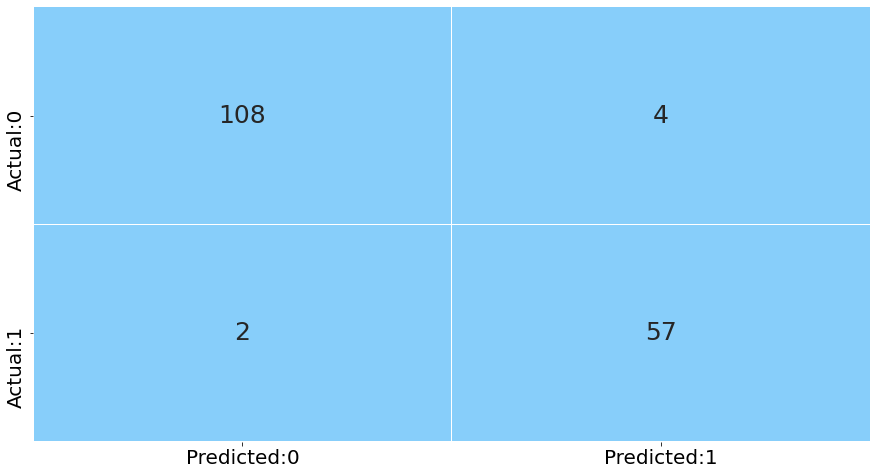

None


In [39]:
def print_ml_results():
    t0 = time()

    # Create classifier.
    rf_model_tune = RandomForestClassifier(
                                  criterion ='entropy' , 
                                  n_estimators = 90,
                                  max_depth = 10,
                                  max_features ='sqrt',
                                  max_leaf_nodes = 8,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)
    # Fit the classifier on the training features and labels.
    t0 = time()
    rf_model_tune = rf_classification.fit(X_train, y_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = rf_model_tune.predict(X_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = rf_model_tune.score(X_test, y_test)
    report = classification_report(y_test, predictions)
    
    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(y_test, predictions))
    print(plot_confusion_matrix(rf_model_tune, test_data = X_test))
print_ml_results()

Training time: 0.096 s
Prediction time: 0.008 s

Report:

Accuracy: 0.9649122807017544

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       112
           1       0.93      0.97      0.95        59

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[108   4]
 [  2  57]]


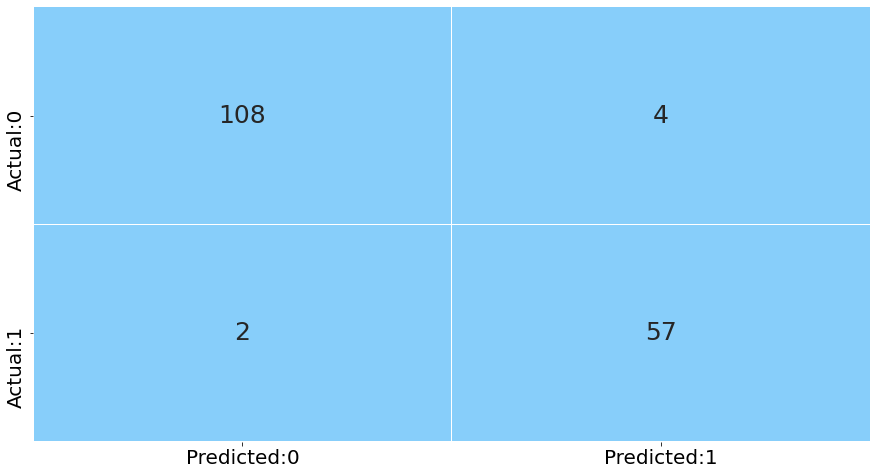

None


In [43]:
rf_model_tune = RandomForestClassifier(
                                  criterion ='entropy' , 
                                  n_estimators = 90,
                                  max_depth = 10,
                                  max_features ='sqrt',
                                  max_leaf_nodes = 8,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)
# Fit the classifier on the training features and labels.
t0 = time()
rf_model_tune = rf_classification.fit(X_train, y_train)
print("Training time:", round(time()-t0, 3), "s")

# Make predictions.
t1 = time()
predictions = rf_model_tune.predict(X_test)
print("Prediction time:", round(time()-t1, 3), "s")

# Evaluate the model.
accuracy = rf_model_tune.score(X_test, y_test)
report = classification_report(y_test, predictions)
    
# Print the reports.
print("\nReport:\n")
print("Accuracy: {}".format(accuracy))
print("\n", report)
print(confusion_matrix(y_test, predictions))
print(plot_confusion_matrix(rf_model_tune, test_data = X_test))

In [40]:
# Random Forest hyper tuned model is the best model to make prediction for cancer dataset. which has the accuarcy rate of 96.5%.
# Decision Tree model accuracy rate is 95% but decision tree model is more likely to get overfitted.
# KNN Model accuracy rate is 98% but KNN model has more likely to get overfitted and also undergo accuracy paradox.

#### to find the ML model is overfitted or underfitted or generalized using cross val score

In [44]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = rf_model_tune, X = X_train, y = y_train, cv = 10)
print("Cross validation of Random Forest model = ",cross_validation)
print("Cross validation of Random Forest model (in mean) = ",cross_validation.mean())

Cross validation of Random Forest model =  [0.95       0.975      0.975      0.975      0.9        0.95
 0.95       0.975      0.94871795 0.8974359 ]
Cross validation of Random Forest model (in mean) =  0.9496153846153847


### Save the Machine Learning model

After completion of the Machine Learning project or building the ML model need to deploy in an application. To deploy the ML model need to save it first. To save the Machine Learning project we can use the pickle or joblib package.

In [48]:
## Pickle
import pickle
 
# save model
pickle.dump(rf_model_tune, open('breast_cancer_detector.pickle', 'wb'))
 
# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))
 
# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)
 
# confusion matrix
print('Confusion matrix of Random Forest model: \n',confusion_matrix(y_test, y_pred),'\n')
 
# show the accuracy
print('Accuracy of Random Forest model = ',accuracy_score(y_test, y_pred))

Confusion matrix of Random Forest model: 
 [[108   4]
 [  2  57]] 

Accuracy of Random Forest model =  0.9649122807017544


We have completed the Machine learning Project successfully with 96.49% accuracy which is great for ‘Breast Cancer Detection using Machine learning’ project. Now, we are ready to deploy our ML model in the healthcare project.